        features_1   features_2   features_3
count  2000.000000  2000.000000  2000.000000
mean     -0.006400     0.013348     0.005297
std       1.006368     0.996602     1.003514
min      -3.718751    -3.613474    -4.242018
25%      -0.683980    -0.663803    -0.686082
50%       0.011044    -0.006613     0.024809
75%       0.674461     0.680902     0.692081
max       3.434959     3.123339     2.764707
            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


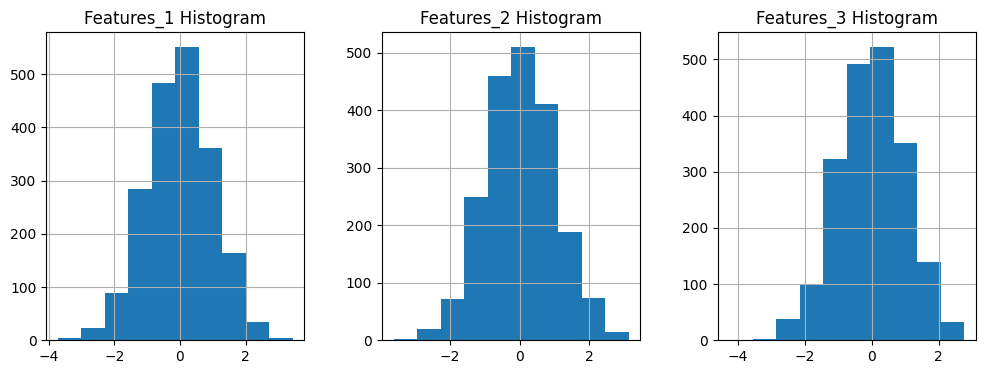

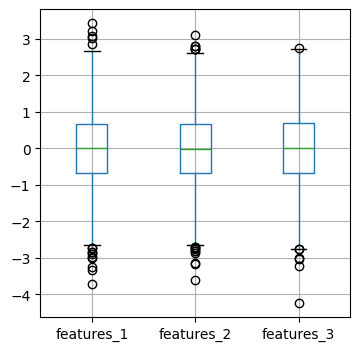

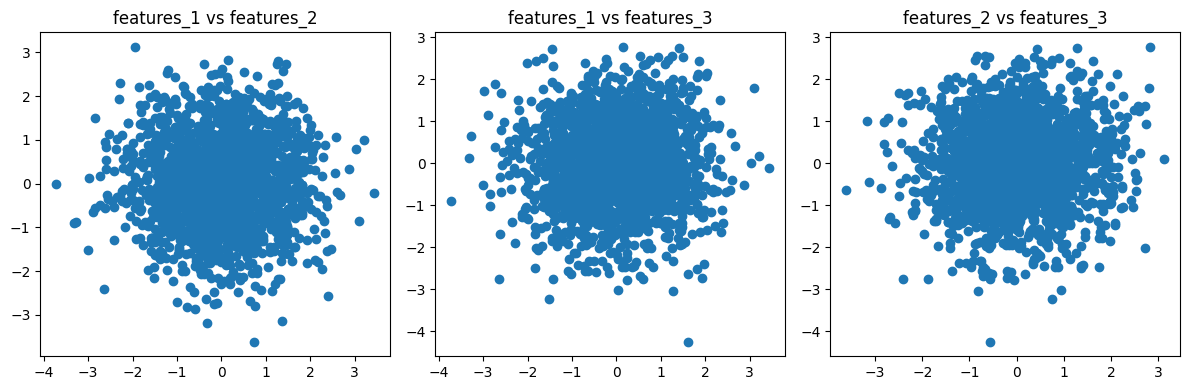

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "regression_generated.csv"
data = pd.read_csv(file_name)

#print(data.shape)  # (2000, 21)
#print(data.columns)  # Index(['label', 'features_1', 'features_2', 'features_3', 'features_4','features_5', 'features_6', 'features_7', 
#'features_8', 'features_9','features_10', 'features_11', 'features_12', 'features_13','features_14', 'features_15', 'features_16', 'features_17',
#'features_18', 'features_19', 'features_20'], dtype='object')
#print(data.dtypes)  # all of them are float64
#print(data.head())
#print(data.isnull().sum())  # 0

print(data[['features_1', 'features_2', 'features_3']].describe())
print(data[['features_1', 'features_2', 'features_3']].corr())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
data[['features_1']].hist(ax=axs[0])
axs[0].set_title('Features_1 Histogram')
data[['features_2']].hist(ax=axs[1])
axs[1].set_title('Features_2 Histogram')
data[['features_3']].hist(ax=axs[2])
axs[2].set_title('Features_3 Histogram')
plt.show()
data[['features_1', 'features_2', 'features_3']].boxplot(figsize=(4, 4))
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(data['features_1'], data['features_2'])
plt.title('features_1 vs features_2')
plt.subplot(132)
plt.scatter(data['features_1'], data['features_3'])
plt.title('features_1 vs features_3')
plt.subplot(133)
plt.scatter(data['features_2'], data['features_3'])
plt.title('features_2 vs features_3')
plt.tight_layout()
plt.show()

# Since features_1 and features_2 are less discrete graphics than scatter plots, it can be said that there is a connection between them.
# According to the correlation, since they are all close to 0, it can be said that they all have a weak relationship. However, this only 
# measures linear relationships, so further analysis is necessary to evaluate other relationships in the data set.
# Since the standard deviation of features_1 is quite high, we can say that the values spread over a wide range.

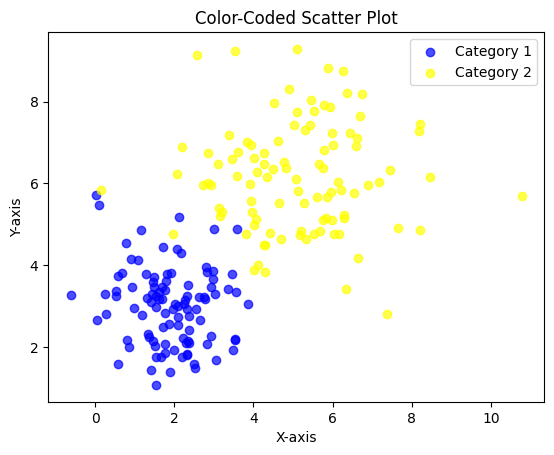

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_gaussian(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

def generate_2d_dataset(category_1_mean, category_2_mean, category_1_std, category_2_std, size_per_category):
    np.random.seed(42)  # for reproducibility  
    category_1 = np.column_stack((
        generate_2d_gaussian(category_1_mean[0], category_1_std[0], size_per_category),
        generate_2d_gaussian(category_1_mean[1], category_1_std[1], size_per_category)
    ))  
    category_2 = np.column_stack((
        generate_2d_gaussian(category_2_mean[0], category_2_std[0], size_per_category),
        generate_2d_gaussian(category_2_mean[1], category_2_std[1], size_per_category)
    ))
    return category_1, category_2

def plot_scatter(dataset_1, dataset_2):
    plt.scatter(dataset_1[:, 0], dataset_1[:, 1], color='blue', label='Category 1', alpha=0.7)
    plt.scatter(dataset_2[:, 0], dataset_2[:, 1], color='yellow', label='Category 2', alpha=0.7)
    plt.title('Color-Coded Scatter Plot');plt.xlabel('X-axis');plt.ylabel('Y-axis');plt.legend();plt.show()

category_1_mean = [2, 3];category_2_mean = [5, 6]
category_1_std = [1, 1];category_2_std = [1.5, 1.5]
size_per_category = 100

category_1_data, category_2_data = generate_2d_dataset(
    category_1_mean, category_2_mean, category_1_std, category_2_std, size_per_category
)

plot_scatter(category_1_data, category_2_data)


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

filename = "residuals_261.pkl"
# Read pickle
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()
print(new_dict)  # {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333, 0.16666667,  0.08333333]), 
#'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
#!type residuals_261.pkl
print(new_dict.dtype)  # object

# Inspect the dataset
# print(data.head())

# # Convert to DataFrame
# df = pd.DataFrame(data)

# # Clean the sample by selecting entries with |residuals| < 2
# cleaned_data = df[np.abs(df['residuals']) < 2]

# # Plot Seaborn jointplot with linear regression
# sns.jointplot(x='distances', y='residuals', data=cleaned_data, kind='reg')
# plt.title('Scatter Plot with Linear Regression')
# plt.show()

# # Create a profile histogram manually
# bin_width = 0.5
# bins = np.arange(0, cleaned_data['distances'].max() + bin_width, bin_width)
# digitized = np.digitize(cleaned_data['distances'], bins)

# x = bins - bin_width / 2
# y = [cleaned_data['residuals'][digitized == i].mean() for i in range(1, len(bins))]
# err_y = [cleaned_data['residuals'][digitized == i].std() for i in range(1, len(bins))]

# # Plot the profile plot on top of the scatter plot
# plt.scatter(cleaned_data['distances'], cleaned_data['residuals'], alpha=0.5, label='Scatter Plot')
# plt.errorbar(x, y, yerr=err_y, fmt='o', color='red', label='Profile Plot')
# plt.title('Profile Plot on Top of Scatter Plot')
# plt.xlabel('Distances')
# plt.ylabel('Residuals')
# plt.legend()
# plt.show()


{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
object


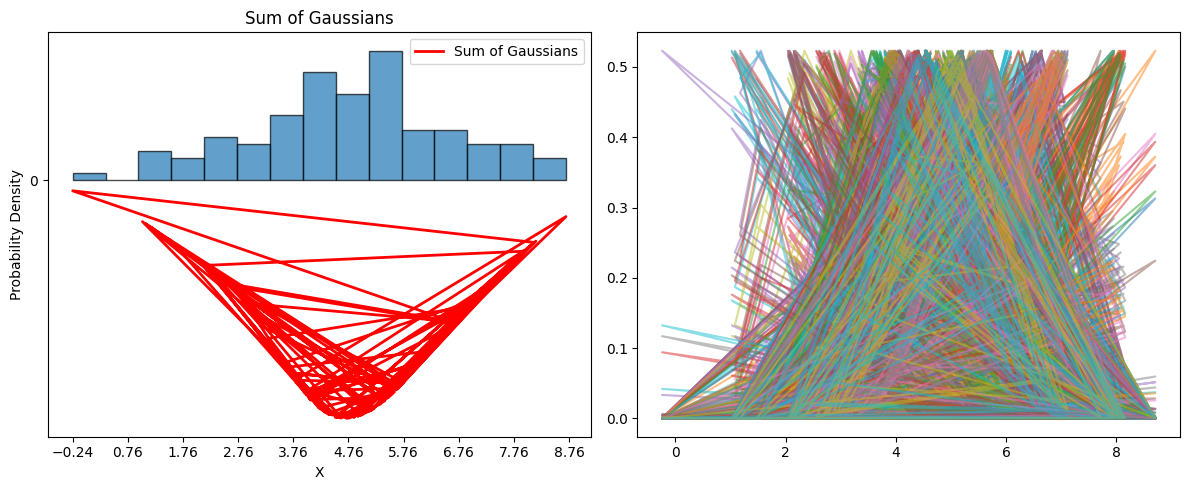

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

np.random.seed(42)
N = 100
mean = 5
std_dev = 2
x = np.random.normal(mean, std_dev, N)
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(x, bins=15, edgecolor='black', alpha=0.7, density=True)
#plt.show()

# Calculate Poisson uncertainty
errors = np.sqrt(hist)

plt.xlabel('X');plt.ylabel('Frequency');plt.title('Original Histogram')
plt.yticks(np.arange(0, max(hist) + 1, 1))
plt.xticks(np.arange(min(x), max(x) + 1, 1))

# Plot Gaussian functions
plt.subplot(1, 2, 2)
gaussian_sum = np.zeros_like(x, dtype=float)

# Default standard deviation for Gaussian functions
default_std_dev = 1.06 * x.std() * N**(-1/5)

for val in x:
    # Create Gaussian with the specified mean and default standard deviation
    gaussian = norm.pdf(x, loc=val, scale=default_std_dev)
    # Plot individual Gaussians
    plt.plot(x, gaussian, alpha=0.5)
    # Add the Gaussian to the sum
    gaussian_sum += gaussian

# Normalize the sum of Gaussians
area_under_gaussians = trapz(gaussian_sum, x)
normalized_gaussian_sum = gaussian_sum / area_under_gaussians

# Superimpose the normalized sum of Gaussians on the original histogram
plt.subplot(1, 2, 1)
plt.plot(x, normalized_gaussian_sum, 'r-', linewidth=2, label='Sum of Gaussians')
plt.legend()

plt.xlabel('X');plt.ylabel('Probability Density');plt.title('Sum of Gaussians')

plt.tight_layout()
plt.show()
